In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
num_samples = 1000

# 1. Age - Normally distributed around 50 with std 10 (clipped 20-80)
age = np.random.normal(loc=50, scale=10, size=num_samples).astype(int)
age = np.clip(age, 20, 80)
print("Age samples (first 10):", age[:10])

# 2. Sex - Binary with 70% male, 30% female
sex = np.random.choice(['M', 'F'], size=num_samples, p=[0.7, 0.3])
print("\nSex samples (first 10):", sex[:10])

# 3. ChestPainType - 4 categories with specified probabilities
chest_pain = np.random.choice(['ATA', 'NAP', 'ASY', 'TA'], 
                             size=num_samples, 
                             p=[0.4, 0.3, 0.25, 0.05])
print("\nChestPainType samples (first 10):", chest_pain[:10])

# 4. RestingBP - Normally distributed around 130 with std 15 (clipped 90-200)
resting_bp = np.random.normal(loc=130, scale=15, size=num_samples).astype(int)
resting_bp = np.clip(resting_bp, 90, 200)
print("\nRestingBP samples (first 10):", resting_bp[:10])

# 5. Cholesterol - Normally distributed around 240 with std 50 (clipped 100-600)
cholesterol = np.random.normal(loc=240, scale=50, size=num_samples).astype(int)
cholesterol = np.clip(cholesterol, 100, 600)
print("\nCholesterol samples (first 10):", cholesterol[:10])

# 6. FastingBS - Binary with 15% having fasting blood sugar > 120 mg/dl
fasting_bs = np.random.choice([0, 1], size=num_samples, p=[0.85, 0.15])
print("\nFastingBS samples (first 10):", fasting_bs[:10])

# 7. RestingECG - 3 categories with specified probabilities
resting_ecg = np.random.choice(['Normal', 'ST', 'LVH'], 
                              size=num_samples, 
                              p=[0.7, 0.2, 0.1])
print("\nRestingECG samples (first 10):", resting_ecg[:10])

# 8. MaxHR - Normally distributed around 140 with std 20 (clipped 60-200)
max_hr = np.random.normal(loc=140, scale=20, size=num_samples).astype(int)
max_hr = np.clip(max_hr, 60, 200)
print("\nMaxHR samples (first 10):", max_hr[:10])

# 9. ExerciseAngina - Binary with 30% having exercise-induced angina
exercise_angina = np.random.choice(['Y', 'N'], size=num_samples, p=[0.3, 0.7])
print("\nExerciseAngina samples (first 10):", exercise_angina[:10])

# 10. Oldpeak - Exponential distribution (most values between 0-4)
oldpeak = np.random.exponential(scale=0.5, size=num_samples)
oldpeak = np.clip(oldpeak, 0, 6)  # Clip extreme values
print("\nOldpeak samples (first 10):", oldpeak[:10])

# 11. ST_Slope - 3 categories with specified probabilities
st_slope = np.random.choice(['Up', 'Flat', 'Down'], 
                           size=num_samples, 
                           p=[0.6, 0.35, 0.05])
print("\nST_Slope samples (first 10):", st_slope[:10])

# 12. HeartDisease - Binary target with 55% having heart disease
heart_disease = np.random.choice([0, 1], size=num_samples, p=[0.45, 0.55])
print("\nHeartDisease samples (first 10):", heart_disease[:10])

# Combine into a DataFrame (optional)
heart_data = pd.DataFrame({
    'Age': age,
    'Sex': sex,
    'ChestPainType': chest_pain,
    'RestingBP': resting_bp,
    'Cholesterol': cholesterol,
    'FastingBS': fasting_bs,
    'RestingECG': resting_ecg,
    'MaxHR': max_hr,
    'ExerciseAngina': exercise_angina,
    'Oldpeak': oldpeak,
    'ST_Slope': st_slope,
    'HeartDisease': heart_disease
})

# Show combined DataFrame (first 5 rows)
print("\nCombined DataFrame (first 5 rows):")
print(heart_data.head())

Age samples (first 10): [54 48 56 65 47 47 65 57 45 55]

Sex samples (first 10): ['M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F']

ChestPainType samples (first 10): ['ATA' 'ATA' 'ATA' 'ATA' 'ASY' 'NAP' 'NAP' 'ATA' 'ASY' 'ATA']

RestingBP samples (first 10): [120 133 148 122 101 139 120 112 120 127]

Cholesterol samples (first 10): [191 290 256 228 198 204 342 240 279 200]

FastingBS samples (first 10): [0 0 0 0 1 0 0 0 0 0]

RestingECG samples (first 10): ['Normal' 'LVH' 'LVH' 'Normal' 'Normal' 'Normal' 'Normal' 'LVH' 'LVH'
 'Normal']

MaxHR samples (first 10): [146 134 136 115 171 157 159 133 105 179]

ExerciseAngina samples (first 10): ['N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N']

Oldpeak samples (first 10): [1.78949249 0.48058824 1.99271966 0.2060606  0.60706494 0.12590247
 0.15136413 0.35861966 0.19255053 0.09173405]

ST_Slope samples (first 10): ['Up' 'Flat' 'Flat' 'Up' 'Flat' 'Up' 'Flat' 'Up' 'Up' 'Flat']

HeartDisease samples (first 10): [0 0 1 1 0 1 1 0 0 0]

Combined DataFrame (first 5 

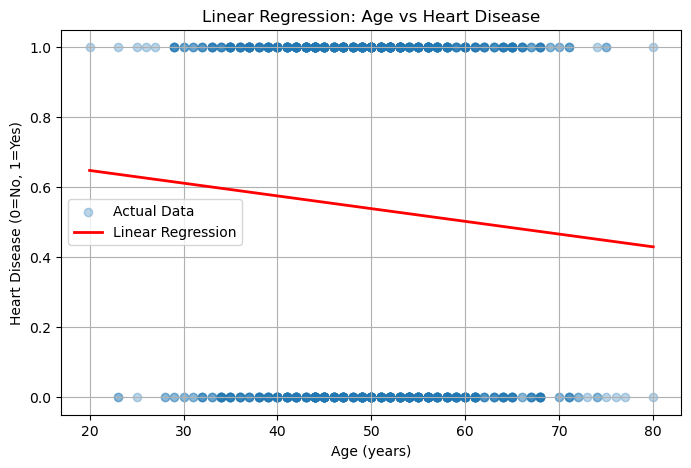

Linear Regression Results:
Age Coefficient: -0.0036
Intercept: 0.7207


In [14]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare data (assuming heart_data is already loaded)
df = heart_data.copy()
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['HeartDisease'] = df['HeartDisease'].astype(float)

# Select features
X_age = df['Age'].values.reshape(-1, 1)
y = df['HeartDisease'].values

# Fit model
lr = LinearRegression()
lr.fit(X_age, y)

# Generate predictions
x_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
y_pred = lr.predict(x_range)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], y, alpha=0.3, label='Actual Data')
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Age vs Heart Disease')
plt.xlabel('Age (years)')
plt.ylabel('Heart Disease (0=No, 1=Yes)')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Regression Results:")
print(f"Age Coefficient: {lr.coef_[0]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
X_age = df['Age'].values.reshape(-1, 1) 
X_multi = df[['Age', 'Cholesterol']].values  
y = df['HeartDisease'].values

y_pred_linear = lr.predict(X_age) 

mse_linear = mean_squared_error(y, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
print("LINEAR REGRESSION ERROR METRICS")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}")
print("="*50)

LINEAR REGRESSION ERROR METRICS
Mean Squared Error (MSE): 0.2471
Root Mean Squared Error (RMSE): 0.4971
Mean Absolute Error (MAE): 0.4943
R-squared (R2): 0.0051


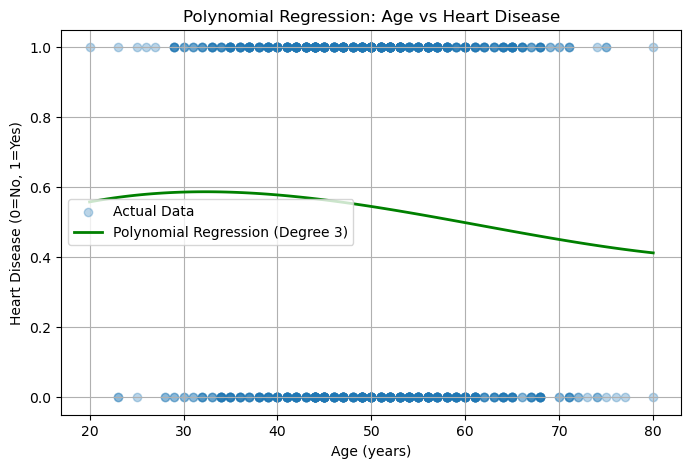

Polynomial Regression Coefficients:
Coefficients: [ 0.00000000e+00  1.68882146e-02 -3.54454886e-04  1.92025007e-06]
Intercept: 0.3467


In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_age)

# Fit polynomial regression
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

# Generate predictions
x_range_poly = poly.transform(x_range)
y_poly_pred = lr_poly.predict(x_range_poly)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], y, alpha=0.3, label='Actual Data')
plt.plot(x_range, y_poly_pred, color='green', linewidth=2, 
         label='Polynomial Regression (Degree 3)')
plt.title('Polynomial Regression: Age vs Heart Disease')
plt.xlabel('Age (years)')
plt.ylabel('Heart Disease (0=No, 1=Yes)')
plt.legend()
plt.grid(True)
plt.show()

print("Polynomial Regression Coefficients:")
print(f"Coefficients: {lr_poly.coef_}")
print(f"Intercept: {lr_poly.intercept_:.4f}")

In [12]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_age)

y_pred_poly = lr_poly.predict(X_poly)

mse_poly = mean_squared_error(y, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("POLYNOMIAL REGRESSION (DEGREE 3) ERROR METRICS")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")   
print(f"R2: {r2_poly:.4f}")


POLYNOMIAL REGRESSION (DEGREE 3) ERROR METRICS
MSE: 0.2471
RMSE: 0.4970
MAE: 0.4941
R2: 0.0054


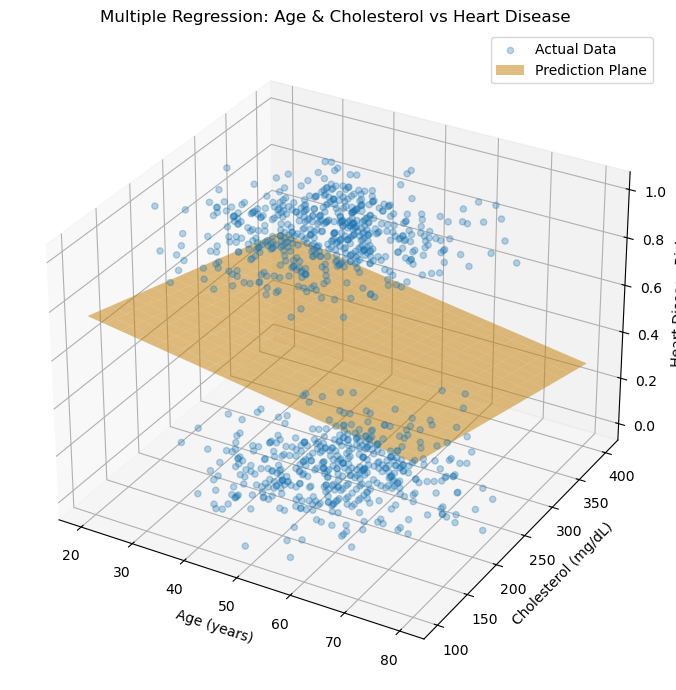

Multiple Regression Coefficients:
Age Coefficient: -0.0034
Cholesterol Coefficient: -0.0009
Intercept: 0.9248


In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Select features
X_multi = df[['Age', 'Cholesterol']].values

# Fit multiple regression
lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)

# Create prediction grid
age_grid = np.linspace(df['Age'].min(), df['Age'].max(), 20)
chol_grid = np.linspace(df['Cholesterol'].min(), df['Cholesterol'].max(), 20)
Age_grid, Cholesterol_grid = np.meshgrid(age_grid, chol_grid)
Z = lr_multi.predict(np.c_[Age_grid.ravel(), Cholesterol_grid.ravel()])
Z = Z.reshape(Age_grid.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Cholesterol'], y, alpha=0.3, label='Actual Data')
ax.plot_surface(Age_grid, Cholesterol_grid, Z, alpha=0.5, color='orange', 
               label='Prediction Plane')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Cholesterol (mg/dL)')
ax.set_zlabel('Heart Disease Risk')
ax.set_title('Multiple Regression: Age & Cholesterol vs Heart Disease')
ax.legend()
plt.tight_layout()
plt.show()

print("Multiple Regression Coefficients:")
print(f"Age Coefficient: {lr_multi.coef_[0]:.4f}")
print(f"Cholesterol Coefficient: {lr_multi.coef_[1]:.4f}")
print(f"Intercept: {lr_multi.intercept_:.4f}")

In [13]:
y_pred_multi = lr_multi.predict(X_multi)  

mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

print("MULTIPLE LINEAR REGRESSION ERROR METRICS")
print(f"MSE: {mse_multi:.4f}")
print(f"RMSE: {rmse_multi:.4f}")
print(f"MAE: {mae_multi:.4f}")
print(f"R2: {r2_multi:.4f}")


MULTIPLE LINEAR REGRESSION ERROR METRICS
MSE: 0.2451
RMSE: 0.4951
MAE: 0.4903
R2: 0.0131
